In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print(train_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    1192

In [4]:
print(test_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   
10    1471         120       RH         26.0     5858   Pave   NaN      IR1   
11    1472         160       RM         21.0     168

In [5]:
# delete all features with majority NaN
combine = [train_df, test_df]

train_df = train_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
test_df = test_df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [6]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
# Drop MSSubClass and MSZoning. Already have columns for yearbuilt, housestyle, Neighborhood, etc.
train_df = train_df.drop(['MSSubClass', 'MSZoning'], axis=1)
test_df = test_df.drop(['MSSubClass', 'MSZoning'], axis=1)

<BarContainer object of 112 artists>

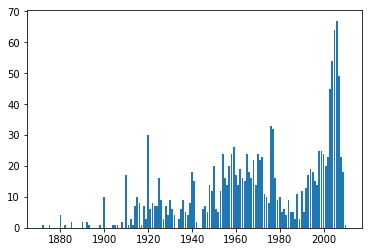

In [8]:
# See distribution of YearBuilt
YearBuilt = train_df[['YearBuilt', 'Street']].groupby('YearBuilt', as_index=False).count()
plt.bar(YearBuilt['YearBuilt'], YearBuilt['Street'])

In [9]:
# Group yearbuilt into age ranges.
def get_age(row):
    if row['YearBuilt'] < 1920:
        return 0
    elif row['YearBuilt'] < 1940:
        return 1
    elif row['YearBuilt'] < 1960:
        return 2
    elif row['YearBuilt'] < 1980:
        return 3
    elif row['YearBuilt'] < 2000:
        return 4
    else: 
        return 5
train_df['Age'] = train_df.apply(lambda row: get_age(row), axis=1)
test_df['Age'] = test_df.apply(lambda row: get_age(row), axis=1)

In [10]:
# See how age affects price
age_v_price = train_df[['SalePrice', 'YearBuilt']].groupby(['YearBuilt']).agg(['mean', 'count'])
print(age_v_price)

               SalePrice      
                    mean count
YearBuilt                     
1872       122000.000000     1
1875        94000.000000     1
1880       200619.750000     4
1882       168000.000000     1
1885       111250.000000     2
1890       142200.000000     2
1892       291250.000000     2
1893       325000.000000     1
1898       106000.000000     1
1900       112492.600000    10
1904       157500.000000     1
1905       163000.000000     1
1906       135000.000000     1
1908       183500.000000     2
1910       111959.058824    17
1911       130000.000000     1
1912       119466.666667     3
1913        90350.000000     1
1914       126055.285714     7
1915       134387.500000    10
1916       139800.000000     8
1917       129500.000000     1
1918       172421.428571     7
1919       154833.333333     3
1920       112903.333333    30
1921       140813.333333     6
1922       109237.500000     8
1923       159428.571429     7
1924       105985.714286     7
1925    

<BarContainer object of 61 artists>

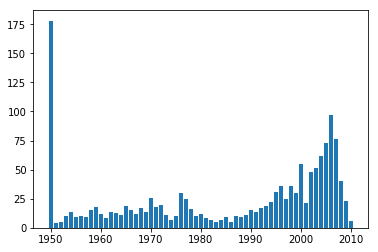

In [11]:
# See distribution of YearRemodAdd
YearBuilt = train_df[['YearRemodAdd', 'Street']].groupby('YearRemodAdd', as_index=False).count()
plt.bar(YearBuilt['YearRemodAdd'], YearBuilt['Street'])

In [12]:
def get_remod_year(row):
    if row['YearRemodAdd'] == 1950:
        return 0
    elif row['YearRemodAdd'] < 1965:
        return 1
    elif row['YearRemodAdd'] < 1980:
        return 2
    elif row['YearRemodAdd'] < 1995:
        return 3
    elif row['YearRemodAdd'] < 2005: 
        return 4

train_df['Remod'] = train_df.apply(lambda row: get_remod_year(row), axis=1)
test_df['Remod'] = test_df.apply(lambda row: get_remod_year(row), axis=1)    

age_v_price = train_df[['SalePrice', 'Remod']].groupby(['Remod']).agg(['mean', 'count'])
print(age_v_price)

           SalePrice      
                mean count
Remod                     
0.0    117463.056180   178
1.0    135384.756579   152
2.0    147573.172000   250
3.0    188892.258824   170
4.0    201507.007595   395


In [13]:
train_df = train_df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)
test_df = test_df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [14]:
# See how quality affects price
print(train_df[['SalePrice', 'OverallQual']].groupby(['OverallQual']).agg(['mean', 'count']))

                 SalePrice      
                      mean count
OverallQual                     
1             50150.000000     2
2             51770.333333     3
3             87473.750000    20
4            108420.655172   116
5            133523.347607   397
6            161603.034759   374
7            207716.423197   319
8            274735.535714   168
9            367513.023256    43
10           438588.388889    18


In [15]:
# See how condition affects price
print(train_df[['SalePrice', 'OverallCond']].groupby(['OverallCond']).agg(['mean', 'count']))

                 SalePrice      
                      mean count
OverallCond                     
1             61000.000000     1
2            141986.400000     5
3            101929.400000    25
4            120438.438596    57
5            203146.914738   821
6            153961.591270   252
7            158145.487805   205
8            155651.736111    72
9            216004.545455    22


In [16]:
# Quality seems to have a greater affect than condition. Drop all condition variables and all non-overall qual vars.
train_df = train_df.drop(['ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'LowQualFinSF', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'OverallCond', 'ExterCond', 'BsmtCond', 'GarageCond'], axis=1)
test_df = test_df.drop(['ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'LowQualFinSF', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'OverallCond', 'ExterCond', 'BsmtCond', 'GarageCond'], axis=1)

In [17]:
train_df.head()

,Id,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,Remod
0,1,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,2,2008,WD,Normal,208500,5,4.0
1,2,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,5,2007,WD,Normal,181500,3,2.0
2,3,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,9,2008,WD,Normal,223500,5,4.0
3,4,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,2,2006,WD,Abnorml,140000,0,2.0
4,5,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,12,2008,WD,Normal,250000,5,4.0


In [18]:
# Segment LotArea by range
def get_area(row):
    if row['LotArea'] < 7000:
        return 0
    elif row['LotArea'] < 8000:
        return 1
    elif row['LotArea'] < 9000:
        return 2
    elif row['LotArea'] < 10000:
        return 3
    elif row['LotArea'] < 11000:
        return 4
    elif row['LotArea'] < 12000:
        return 5
    elif row['LotArea'] < 13000:
        return 6
    else:
        return 7

train_df['LotArea'] = train_df.apply(lambda row: get_area(row), axis=1)
test_df['LotArea'] = test_df.apply(lambda row: get_area(row), axis=1)    

print(train_df[['SalePrice', 'LotArea']].groupby(['LotArea']).agg(['mean', 'count']))

             SalePrice      
                  mean count
LotArea                     
0        139388.538182   275
1        148609.692810   153
2        155813.051020   196
3        175187.873239   213
4        182979.565714   175
5        207037.601562   128
6        223571.666667    87
7        245701.579399   233


In [19]:
# Drop all area-related fields
train_df = train_df.drop(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], axis=1)
test_df = test_df.drop(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'], axis=1)

In [20]:
print(train_df[['SalePrice', 'LandContour']].groupby(['LandContour']).agg(['mean', 'count']))
# No pattern

                 SalePrice      
                      mean count
LandContour                     
Bnk          143104.079365    63
HLS          231533.940000    50
Low          203661.111111    36
Lvl          180183.746758  1311


In [21]:
print(train_df[['SalePrice', 'LandSlope']].groupby(['LandSlope']).agg(['mean', 'count']))
# Pattern exists

               SalePrice      
                    mean count
LandSlope                     
Gtl        179956.799566  1382
Mod        196734.138462    65
Sev        204379.230769    13


In [22]:
def get_slope(row):
    if row['LandSlope'] == 'Gtl':
        return 0
    elif row['LandSlope'] == 'Mod':
        return 1
    elif row['LandSlope'] == 'Sev':
        return 2
    
train_df['LandSlope'] = train_df.apply(lambda row: get_slope(row), axis=1)
test_df['LandSlope'] = test_df.apply(lambda row: get_slope(row), axis=1)    

In [23]:
print(train_df[['SalePrice', 'RoofMatl']].groupby(['RoofMatl']).agg(['mean', 'count']))
# No pattern

              SalePrice      
                   mean count
RoofMatl                     
ClyTile   160000.000000     1
CompShg   179803.679219  1434
Membran   241500.000000     1
Metal     180000.000000     1
Roll      137000.000000     1
Tar&Grv   185406.363636    11
WdShake   241400.000000     5
WdShngl   390250.000000     6


In [24]:
print(train_df[['SalePrice', 'Heating']].groupby(['Heating']).agg(['mean', 'count']))
# Separate gas and no gas

             SalePrice      
                  mean count
Heating                     
Floor     72500.000000     1
GasA     182021.195378  1428
GasW     166632.166667    18
Grav      75271.428571     7
OthW     125750.000000     2
Wall      92100.000000     4


In [25]:
def get_heating(row):
    if row['Heating'] == 'GasA' or row['Heating'] == 'GasW':
        return 0
    else:
        return 1
    
train_df['Heating'] = train_df.apply(lambda row: get_heating(row), axis=1)
test_df['Heating'] = test_df.apply(lambda row: get_heating(row), axis=1)    

In [26]:
print(train_df[['SalePrice', 'Functional']].groupby(['Functional']).agg(['mean', 'count']))
# Separate typical and not

                SalePrice      
                     mean count
Functional                     
Maj1        153948.142857    14
Maj2         85800.000000     5
Min1        146385.483871    31
Min2        144240.647059    34
Mod         168393.333333    15
Sev         129000.000000     1
Typ         183429.147059  1360


In [27]:
def get_functional(row):
    if row['Functional'] == 'Typ':
        return 0
    else:
        return 1
train_df['Functional'] = train_df.apply(lambda row: get_functional(row), axis=1)
test_df['Functional'] = test_df.apply(lambda row: get_functional(row), axis=1)    

In [28]:
print(train_df[['SalePrice', 'PavedDrive']].groupby(['PavedDrive']).agg(['mean', 'count']))
# Convert this

                SalePrice      
                     mean count
PavedDrive                     
N           115039.122222    90
P           132330.000000    30
Y           186433.973881  1340


In [29]:
def get_paved(row):
    if row['PavedDrive'] == 'N':
        return 0
    elif row['PavedDrive'] == 'P':
        return 1
    elif row['PavedDrive'] == 'Y':
        return 2
    
train_df['PavedDrive'] = train_df.apply(lambda row: get_paved(row), axis=1)
test_df['PavedDrive'] = test_df.apply(lambda row: get_paved(row), axis=1)    

In [30]:
print(train_df[['SalePrice', 'SaleCondition']].groupby(['SaleCondition']).agg(['mean', 'count']))
# Partial, normal, others

                   SalePrice      
                        mean count
SaleCondition                     
Abnorml        146526.623762   101
AdjLand        104125.000000     4
Alloca         167377.416667    12
Family         149600.000000    20
Normal         175202.219533  1198
Partial        272291.752000   125


In [31]:
def get_salecondition(row):
    if row['SaleCondition'] == 'Partial':
        return 0
    elif row['SaleCondition'] == 'Normal':
        return 1
    else:
        return 2
    
train_df['SaleCondition'] = train_df.apply(lambda row: get_salecondition(row), axis=1)
test_df['SaleCondition'] = test_df.apply(lambda row: get_salecondition(row), axis=1)    

In [32]:
print(train_df[['SalePrice', 'SaleType']].groupby(['SaleType']).agg(['mean', 'count']))
# No pattern

              SalePrice      
                   mean count
SaleType                     
COD       143973.255814    43
CWD       210600.000000     4
Con       269600.000000     2
ConLD     138780.888889     9
ConLI     200390.000000     5
ConLw     143700.000000     5
New       274945.418033   122
Oth       119850.000000     3
WD        173401.836622  1267


In [33]:
print(train_df[['SalePrice', 'Street']].groupby(['Street']).agg(['mean', 'count']))
# Too skewed

            SalePrice      
                 mean count
Street                     
Grvl    130190.500000     6
Pave    181130.538514  1454


In [34]:
# See how HouseStyle affects price
print(train_df[['SalePrice', 'HouseStyle']].groupby(['HouseStyle']).agg(['mean', 'count']))

                SalePrice      
                     mean count
HouseStyle                     
1.5Fin      143116.740260   154
1.5Unf      110150.000000    14
1Story      175985.477961   726
2.5Fin      220000.000000     8
2.5Unf      157354.545455    11
2Story      210051.764045   445
SFoyer      135074.486486    37
SLvl        166703.384615    65


In [35]:
# Drop more fields with no clear distribution or too heavily skewed
train_df = train_df.drop(['LotFrontage', 'LandContour', 'RoofMatl', 'SaleType', 'Street', 'HouseStyle'], axis=1)
test_df = test_df.drop(['LotFrontage', 'LandContour', 'RoofMatl', 'SaleType', 'Street', 'HouseStyle'], axis=1)

In [36]:
train_df.head()

,Id,LotArea,LotShape,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,GarageFinish,GarageCars,PavedDrive,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Age,Remod
0,1,2,Reg,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,...,RFn,2,2,0,2,2008,1,208500,5,4.0
1,2,3,Reg,AllPub,FR2,0,Veenker,Feedr,Norm,1Fam,...,RFn,2,2,0,5,2007,1,181500,3,2.0
2,3,5,IR1,AllPub,Inside,0,CollgCr,Norm,Norm,1Fam,...,RFn,2,2,0,9,2008,1,223500,5,4.0
3,4,3,IR1,AllPub,Corner,0,Crawfor,Norm,Norm,1Fam,...,Unf,3,2,0,2,2006,2,140000,0,2.0
4,5,7,IR1,AllPub,FR2,0,NoRidge,Norm,Norm,1Fam,...,RFn,3,2,0,12,2008,1,250000,5,4.0


In [37]:
# See how neighborhood affects price
print(train_df[['SalePrice', 'Neighborhood']].groupby(['Neighborhood']).agg(['mean', 'count']))

                  SalePrice      
                       mean count
Neighborhood                     
Blmngtn       194870.882353    17
Blueste       137500.000000     2
BrDale        104493.750000    16
BrkSide       124834.051724    58
ClearCr       212565.428571    28
CollgCr       197965.773333   150
Crawfor       210624.725490    51
Edwards       128219.700000   100
Gilbert       192854.506329    79
IDOTRR        100123.783784    37
MeadowV        98576.470588    17
Mitchel       156270.122449    49
NAmes         145847.080000   225
NPkVill       142694.444444     9
NWAmes        189050.068493    73
NoRidge       335295.317073    41
NridgHt       316270.623377    77
OldTown       128225.300885   113
SWISU         142591.360000    25
Sawyer        136793.135135    74
SawyerW       186555.796610    59
Somerst       225379.837209    86
StoneBr       310499.000000    25
Timber        242247.447368    38
Veenker       238772.727273    11


In [38]:
# Segment by price ranges
# 0 = NoRidge, NridgHt, StoneBr; 1 = ClearCr, Crawfor, Somerst, Timber, Veenker; 2 = everything else
def get_neighborhood(row):
    if row['Neighborhood'] == 'NoRidge' or row['Neighborhood'] == 'NridgHt' or row['Neighborhood'] == 'StoneBr':
        return 0
    elif row['Neighborhood'] == 'ClearCr' or row['Neighborhood'] == 'Crawfor' or row['Neighborhood'] == 'Somerst' or row['Neighborhood'] == 'Timber' or row['Neighborhood'] == 'Veenker':
        return 1
    elif row['Neighborhood'] == 'Blmngtn' or row['Neighborhood'] == 'CollgCr' or row['Neighborhood'] == 'Gilbert' or row['Neighborhood'] == 'NWAmes' or row['Neighborhood'] == 'SawyerW':
        return 2
    else:
        return 3
    
train_df['Neighborhood'] = train_df.apply(lambda row: get_neighborhood(row), axis=1)
test_df['Neighborhood'] = test_df.apply(lambda row: get_neighborhood(row), axis=1)    

In [39]:
# Drop more fields that seem likely irrelevant
train_df = train_df.drop(['LotShape', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'GarageFinish', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageYrBlt', 'BsmtExposure', 'CentralAir', 'Electrical', 'GarageType', 'YrSold', 'MiscVal', 'Remod', 'KitchenAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Heating'], axis=1)
test_df = test_df.drop(['LotShape', 'Utilities', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 'GarageFinish', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageYrBlt', 'BsmtExposure', 'CentralAir', 'Electrical', 'GarageType', 'YrSold', 'MiscVal', 'Remod', 'KitchenAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'Heating'], axis=1)

In [40]:
train_df.head()

,Id,LotArea,LandSlope,Neighborhood,OverallQual,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Functional,GarageCars,PavedDrive,MoSold,SaleCondition,SalePrice,Age
0,1,2,0,2,7,2,1,3,8,0,2,2,2,1,208500,5
1,2,3,0,1,6,2,0,3,6,0,2,2,5,1,181500,3
2,3,5,0,2,7,2,1,3,6,0,2,2,9,1,223500,5
3,4,3,0,1,7,1,0,3,7,0,3,2,2,2,140000,0
4,5,7,0,0,8,2,1,4,9,0,3,2,12,1,250000,5


In [41]:

# test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].dropna().median(), inplace=True)
# test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].dropna().median(), inplace=True)
test_df['GarageCars'].fillna(test_df['GarageCars'].dropna().median(), inplace=True)

In [42]:
X_train = train_df.drop(['SalePrice', 'Id'], axis=1)
Y_train = train_df['SalePrice']
X_test  = test_df.drop('Id', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1460, 14), (1460,), (1459, 14))

In [43]:
print(X_train)

      LotArea  LandSlope  Neighborhood  OverallQual  FullBath  HalfBath  \
0           2          0             2            7         2         1   
1           3          0             1            6         2         0   
2           5          0             2            7         2         1   
3           3          0             1            7         1         0   
4           7          0             0            8         2         1   
5           7          0             3            5         1         1   
6           4          0             1            8         2         0   
7           4          0             2            7         2         1   
8           0          0             3            7         2         0   
9           1          0             3            5         1         0   
10          5          0             3            5         1         0   
11          5          0             0            9         3         0   
12          6          0 

In [44]:
print(Y_train)

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [45]:
print(X_test)

      LotArea  LandSlope  Neighborhood  OverallQual  FullBath  HalfBath  \
0           5          0             3            5         1         0   
1           7          0             3            6         1         1   
2           7          0             2            5         2         1   
3           3          0             2            6         2         1   
4           0          0             0            8         2         0   
5           4          0             2            6         2         1   
6           1          0             2            6         2         0   
7           2          0             2            6         2         1   
8           4          0             2            7         1         1   
9           2          0             3            4         1         0   
10          0          0             3            7         2         0   
11          0          0             3            6         1         1   
12          0          0 

In [46]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

15.68

In [47]:
# SVM
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

12.81

In [48]:
linsvc = LinearSVC()
linsvc.fit(X_train, Y_train)
Y_pred = linsvc.predict(X_test)
acc_linsvc = round(linsvc.score(X_train, Y_train) * 100, 2)
acc_linsvc

22.81

In [49]:
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
acc_forest = round(forest.score(X_train, Y_train) * 100, 2)
acc_forest

96.1

In [50]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

32.95

In [51]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

41.37

In [52]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.12

In [53]:

# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

In [54]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": Y_pred
    })

In [55]:
submission.to_csv('submission.csv', index=False)